In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#<img src="cms_coordinates_1.png">
#<img src="cms_coordinates_2.png">
import IPython.display as display
import ipywidgets as widgets

img1=open('cms_coordinates_1.png','rb').read()
wi1 = widgets.Image(value=img1, format='jpg', width=400, height=400)
img2=open('cms_coordinates_2.png','rb').read()
wi2 = widgets.Image(value=img2, format='jpg', width=400, height=400)
a=[wi1,wi2]
wid=widgets.HBox(a)
display.display(wid)

## Please, for this studies, take into account the Appropriate Coordinate system

For example: as CMS is of the cylindrical type, appropriate coordinates are deﬁned to track particles. The Cartesian coordinates X, Y, and Z are ﬁrst set: X points to the center of the accelerator, Y to the surface, and Z in the direction of the beam, as illustrated in Figures. The XY plane is also referred to as the transverse plane. The problem with this set of coordinates is that the physics is not symmetrical under these, which would be a beneﬁcial feature. Therefore, the rapidity y, a Lorentz invariant over which the particles in the ﬁnal state. are equally distributed, is used. The rapidity is deﬁned as.

$$ y = \frac{1}{2} ln(\frac{E+p_{z}}{E-p_{z}}) $$

which for highly relativistic particles can be approximated by the pseudo-rapidity

$$ \eta = -ln(tan(\frac{\theta}{2})) $$

where $\theta$ is the polar angle (angle between the particle and the Z axis). The other coordinates are the azimuth $\phi$ (angle in the XY plane), and the distance to the beam in the transverse plane R for tracks the barrel, and the Z coordinate for tracks the endcaps.

In [3]:
"""
We will not use these functions. 
These are just to show you, in a simple way, "the transformation laws" (see more below).
"""
def calculte_energy(masa, pt, eta):
    return np.sqrt(masa**2 + pt**2 * np.cosh(eta)**2)

def calculate_momentum(pt, phi, eta):
    px = pt * np.cos(phi)
    py = pt * np.sin(phi)
    pz = pt * np.sinh(eta)
    return np.array([px, py, pz])

### Create a new DataFrame structure and save it in the file 'dataset'.
Data can be obtained from a file with the read_csv() -function. Inside the parentheses, we write the path of the file.

In [4]:
# take from: 
## https://opendata-education.github.io/en_Physics/Exercises-with-open-data/Warming-up/Calculate-invariant-mass.html
Dpd = pd.read_csv('Zmumu.csv')
#print(Dpd)
Dpd.head()

,Type,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,GT,148031,10507008,82.201866,-41.195288,17.433244,-68.964962,44.7322,-1.217690,2.741260,1,60.621875,34.144437,-16.119525,-47.426984,38.8311,-1.05139,-0.440873,-1,82.462692
1,TT,148031,10507008,62.344929,35.118050,-16.570362,-48.775247,38.8311,-1.051390,-0.440873,-1,82.201866,-41.195288,17.433244,-68.964962,44.7322,-1.21769,2.741260,1,83.626204
2,GT,148031,10507008,62.344929,35.118050,-16.570362,-48.775247,38.8311,-1.051390,-0.440873,-1,81.582778,-40.883323,17.299297,-68.447255,44.7322,-1.21769,2.741260,1,83.308465
3,GG,148031,10507008,60.621875,34.144437,-16.119525,-47.426984,38.8311,-1.051390,-0.440873,-1,81.582778,-40.883323,17.299297,-68.447255,44.7322,-1.21769,2.741260,1,82.149373
4,GT,148031,105238546,41.826389,22.783582,15.036444,-31.689894,27.2981,-0.990688,0.583351,1,49.760726,-20.177373,-9.354149,44.513955,21.8913,1.44434,-2.707650,-1,90.469123


### Let us use the following expression for the invariant mass $M$ in the calculation:

$$ M = \sqrt{(E_1 + E_2)^2 - \|\textbf{p}_1 + \textbf{p}_2 \| ^2} = \sqrt{(E_1+E_2)^2-((p_{1_x}+p_{2_x})^2+(p_{1_y}+p_{2_y})^2+(p_{1_z}+p_{2_z})^2)},$$

where $\textbf{p}$ contains all the components of the momentum. The equation above gives us the precise value of the invariant mass, so let's use it when possible.

In [5]:
#Invariante mass using px,py,pz and E
Dpd['InvMp'] = np.sqrt( (Dpd['E1']+Dpd['E2'])*(Dpd['E1']+Dpd['E2']) - ( (Dpd['px1']+Dpd['px2'])*(Dpd['px1']+Dpd['px2']) \
                                                                     + (Dpd['py1']+Dpd['py2'])*(Dpd['py1']+Dpd['py2']) \
                                                                     + (Dpd['pz1']+Dpd['pz2'])*(Dpd['pz1']+Dpd['pz2'])  ) )

### However, some datasets don't have the components of the momentum in them. 
In this case, we can use an approximation that works in situations where E >> m (as is often the case in particle detectors):

$$M = \sqrt{2p_{T1}p_{T2}(\cosh(\eta_1-\eta_2)-\cos(\phi_1-\phi_2))}.$$

In the expression $p_T$ is the component of the momentum which is perpendicular to the beam axis, $\eta$ is the pseudorapidity (angle) and $\phi$ the azimuthal angle.

In [6]:
Dpd['InvMA'] = np.sqrt( 2*Dpd['pt1']*Dpd['pt2']*( np.cosh(Dpd['eta1']-Dpd['eta2']) - \
                                                 np.cos(Dpd['phi1']-Dpd['phi2']) ) )

<function matplotlib.pyplot.show(close=None, block=None)>

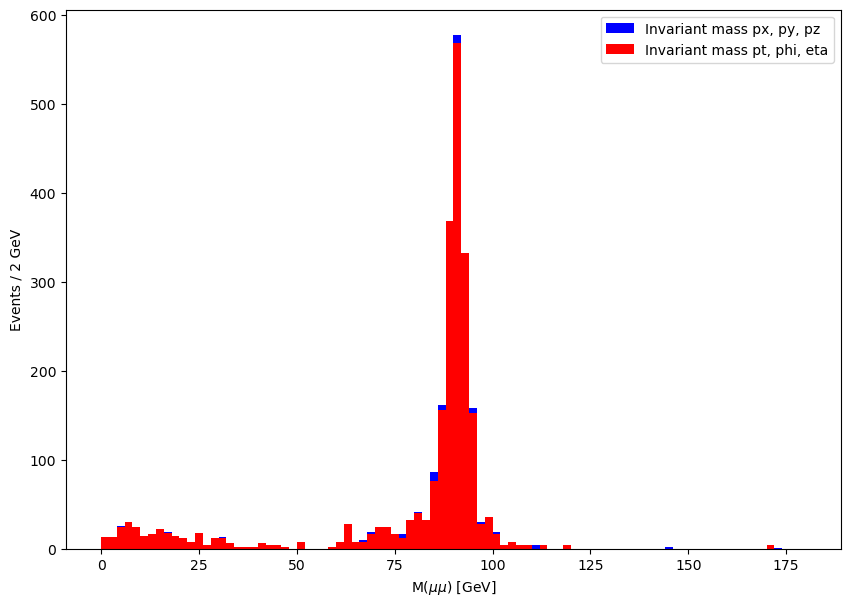

In [7]:
plt.figure(figsize=(10,7))
plt.title('')

plt.hist(Dpd.InvMp, range=[0,180], bins=90, color='blue', label="Invariant mass px, py, pz")#, grid=False, 
plt.hist(Dpd.InvMA, range=[0,180], bins=90, color='red', label="Invariant mass pt, phi, eta")#edgecolor='blue',                                                  
#Dpd.hist(column='M', bins=100, alpha=.6, edgecolor='blue', grid=False)

plt.legend()
#plt.xscale("log")
plt.xlabel('M($\mu\mu$) [GeV]')
plt.ylabel('Events / 2 GeV')
plt.show
#plt.savefig(f'Histo_massmumu_relativisticapproach.png') ##E >> m

### Now, we can make the transformations by we self. 
The energy E and the moment p are related to the mass (m), the transverse moment (pT), the pseudo-rapidity (η), and the azimuthal angle (ϕ) by the following equations:

$E = \sqrt{m^2 + p_T^2 \cosh^2(\eta)} $

$ p_{x} = P_{T} cos(\phi)$

$ p_{y} = P_{T} sin(\phi)$

$ p_{z} = P_{T} sinh(\eta)$

In [8]:
Dpd['Mypx1'] = Dpd['pt1']*np.cos(Dpd['phi1'])
Dpd['Mypy1'] = Dpd['pt1']*np.sin(Dpd['phi1'])
Dpd['Mypz1'] = Dpd['pt1']*np.sinh(Dpd['eta1'])
##in this case, the mass of the muon (~~0.10567)
Dpd['Mmu'] = 0.10567
Dpd['MyE1']  = np.sqrt(Dpd['Mmu']**2 + (Dpd['pt1']**2 * np.cosh(Dpd['eta1'])**2) )

Dpd['Mypx2'] = Dpd['pt2']*np.cos(Dpd['phi2'])
Dpd['Mypy2'] = Dpd['pt2']*np.sin(Dpd['phi2'])
Dpd['Mypz2'] = Dpd['pt2']*np.sinh(Dpd['eta2'])
Dpd['MyE2']  = np.sqrt( Dpd['Mmu']**2 + (Dpd['pt2']**2 * np.cosh(Dpd['eta2'])**2) )

Dpd['InvM_MyM'] = np.sqrt( (Dpd['MyE1']+Dpd['MyE2'])*(Dpd['MyE1']+Dpd['MyE2']) - ( (Dpd['Mypx1']+Dpd['Mypx2'])*(Dpd['Mypx1']+Dpd['Mypx2']) \
                                                                     + (Dpd['Mypy1']+Dpd['Mypy2'])*(Dpd['Mypy1']+Dpd['Mypy2']) \
                                                                     + (Dpd['Mypz1']+Dpd['Mypz2'])*(Dpd['Mypz1']+Dpd['Mypz2'])  ) )

<function matplotlib.pyplot.show(close=None, block=None)>

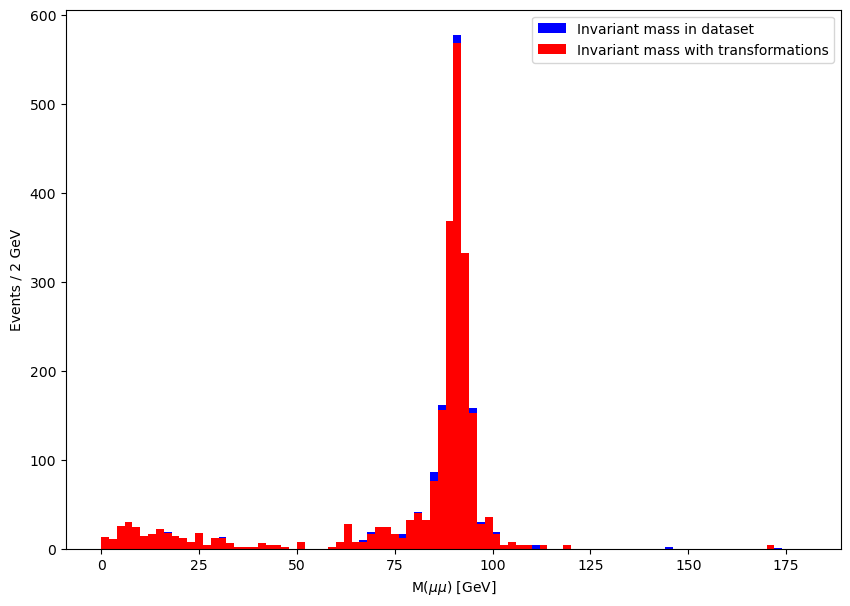

In [11]:
plt.figure(figsize=(10,7))
plt.title('')

plt.hist(Dpd.M, range=[0,180], bins=90, color='blue', label="Invariant mass in dataset")#, grid=False, 
plt.hist(Dpd.InvM_MyM, range=[0,180], bins=90, color='red', label="Invariant mass with transformations")#edgecolor='blue',                                                  
#Dpd.hist(column='M', bins=100, alpha=.6, edgecolor='blue', grid=False)

plt.legend()
#plt.xscale("log")
plt.xlabel('M($\mu\mu$) [GeV]')
plt.ylabel('Events / 2 GeV')
plt.show
#plt.savefig(f'Histo_massmumu.png') 